## Exploratory Data Analysis

### Raw Data

Read the raw data

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

save_figures = True
figure_path = "../figures/raw/"

In [2]:
df_plastic = pd.read_spss("../data/ESM00385X1 Observational Study.sav")
df_plastic.head()

,CONTEXT,IDCODE,Year,Country,Supermarket,Time,Weather,ObsSize,FemaleN,MaleN,...,CANVAS,CANVASBinary,OWNBAGBinary,OWNBAGSum,Other_Rucksack,Other_Handbag,Other_Other,NoBag,OtherBag,BagUseGroup
0,2016Wales.LocalStore.AM,2100001.0,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,1.0,0.0,1.0,...,Yes Canvas/Tote,CANVAS used,OWNBAG used,2.0,No,No,No,Bag used,NA,Only Own bags used
1,2016Wales.LocalStore.AM,2100002.0,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,1.0,0.0,1.0,...,No,No,OWNBAG used,1.0,No,No,No,Bag used,NA,Only Own bags used
2,2016Wales.LocalStore.AM,2100003.0,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,1.0,1.0,0.0,...,Yes Canvas/Tote,CANVAS used,OWNBAG used,1.0,No,No,No,Bag used,NA,Only Own bags used
3,2016Wales.LocalStore.AM,2100004.0,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,2.0,2.0,0.0,...,2.0,CANVAS used,OWNBAG used,2.0,No,No,No,Bag used,NA,Only Own bags used
4,2016Wales.LocalStore.AM,2100005.0,2016,Wales,Tesco Metro,Morning (10.30-11.30),Sunny,1.0,1.0,0.0,...,No,No,No,0.0,No,Yes Handbag,No,No bag used,"Other bag used (Rucksack, Handbag, etc.)",Other (Misc) bags used


Number of rows and columns

In [3]:
df_plastic.shape

(3764, 31)

Data types of each column

In [4]:
df_plastic.dtypes

CONTEXT           category
IDCODE             float64
Year              category
Country           category
Supermarket       category
Time              category
Weather           category
ObsSize            float64
FemaleN            float64
MaleN              float64
Gender            category
Age               category
Child             category
SUPB_Own           float64
SUPB_Other         float64
SUPBBinary        category
SUPBSum            float64
B4L_Own            float64
B4L_Other          float64
B4LBinary         category
B4LSum             float64
CANVAS            category
CANVASBinary      category
OWNBAGBinary      category
OWNBAGSum          float64
Other_Rucksack    category
Other_Handbag     category
Other_Other       category
NoBag             category
OtherBag          category
BagUseGroup       category
dtype: object

Overall Bag Usage Summary

In [5]:
df_bar1 = df_plastic[["IDCODE", "BagUseGroup"]]\
    .groupby(["BagUseGroup"])\
    .agg("count")

BagUseGroup_order = ["Only SUPB used", "SUPB & Own bags used", "Only Own bags used", "Other (Misc) bags used", "No bags used"]

df_bar1 = df_bar1.loc[BagUseGroup_order,:]\
    .reset_index()\
    .rename(columns = {"IDCODE": "count"})\

df_bar1["proportion"] = df_bar1["count"]/df_plastic.shape[0]
df_bar1

,BagUseGroup,count,proportion
0,Only SUPB used,824,0.218916
1,SUPB & Own bags used,168,0.044633
2,Only Own bags used,1774,0.471307
3,Other (Misc) bags used,498,0.132306
4,No bags used,500,0.132837


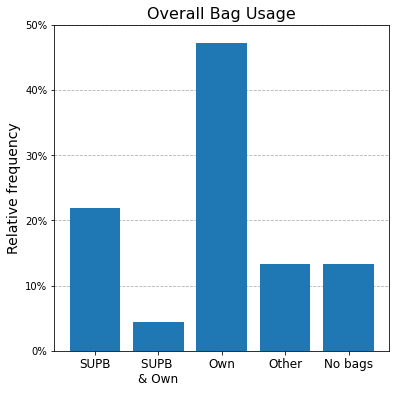

In [6]:
fig_bar, ax_bar = plt.subplots()
ax_bar.bar(x = df_bar1["BagUseGroup"],
           height = df_bar1["proportion"], width = 0.8, zorder = 100)

ax_bar.set_xlabel("") 
ax_bar.set_ylabel("Relative frequency", fontsize = 14)
ax_bar.set_title("Overall Bag Usage", fontsize = 16)
ax_bar.set_xticks(BagUseGroup_order)
ax_bar.set_xticklabels(["SUPB", "SUPB \n& Own", "Own", "Other", "No bags"], 
                       rotation = 0, 
                       horizontalalignment = "center", 
                       fontsize = 12)

ax_bar.set_yticks(np.arange(0, 0.6, 0.1))
ax_bar.set_yticklabels(["0%", "10%", "20%", "30%", "40%", "50%"])
ax_bar.grid(axis = "y", linestyle = "dashed", zorder = -100)

fig_bar.set_size_inches([6, 6])

if save_figures:
    fig_name = f"{figure_path}Bag Usage"
    fig_bar.savefig(f"{fig_name}.pdf", dpi = 300)
    fig_bar.savefig(f"{fig_name}.png", dpi = 300)
    fig_bar.savefig(f"{fig_name}.svg", dpi = 300)

#### Stacked bar plots

In [7]:
df_bar2 = df_plastic[["IDCODE", "BagUseGroup", "Country", "Year"]]\
    .groupby(["BagUseGroup", "Country", "Year"])\
    .agg("count")

df_bar2 = df_bar2.reorder_levels([1,2,0]).unstack()
df_bar2.columns = df_bar2.columns.droplevel()
df_bar2.columns.name = None
df_bar2 

BagUseGroup_order = ["Only SUPB used", "SUPB & Own bags used", "Only Own bags used", "Other (Misc) bags used", "No bags used"]

df_bar2 = df_bar2[BagUseGroup_order]
df_bar2 = df_bar2.reset_index()
df_bar2

new_col_names =  ["Only SUPB", "SUPB & Own bags", "Only Own bags", "Other (Misc) bags", "No bags"]
new_col_dict = dict(list(zip(BagUseGroup_order, new_col_names)))
df_bar2 = df_bar2.rename(columns = new_col_dict)

df_bar2

,Country,Year,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags
0,England,2015,392,54,169,120,84
1,England,2016,167,41,523,172,81
2,Wales,2015,107,32,437,84,158
3,Wales,2016,158,41,645,122,177


In [8]:
df_bar2["sum_cy"] = np.zeros(4, dtype = int)
for each_col in new_col_names:
    df_bar2["sum_cy"] += df_bar2[each_col]

for each_col in new_col_names:
    df_bar2[each_col] = df_bar2[each_col]/df_bar2["sum_cy"]
df_bar2

,Country,Year,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy
0,England,2015,0.478632,0.065934,0.206349,0.146520,0.102564,819
1,England,2016,0.169715,0.041667,0.531504,0.174797,0.082317,984
2,Wales,2015,0.130807,0.039120,0.534230,0.102689,0.193154,818
3,Wales,2016,0.138233,0.035871,0.564304,0.106737,0.154856,1143


In [9]:
df_bar2[f"{new_col_names[0]}_bot"] = np.zeros(4, dtype = int)

for i,c in enumerate(new_col_names):
    if i == 0:
        continue
    df_bar2[f"{new_col_names[i]}_bot"] = df_bar2[f"{new_col_names[i-1]}_bot"] + df_bar2[new_col_names[i-1]]
    
df_bar2

,Country,Year,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy,Only SUPB_bot,SUPB & Own bags_bot,Only Own bags_bot,Other (Misc) bags_bot,No bags_bot
0,England,2015,0.478632,0.065934,0.206349,0.146520,0.102564,819,0,0.478632,0.544567,0.750916,0.897436
1,England,2016,0.169715,0.041667,0.531504,0.174797,0.082317,984,0,0.169715,0.211382,0.742886,0.917683
2,Wales,2015,0.130807,0.039120,0.534230,0.102689,0.193154,818,0,0.130807,0.169927,0.704156,0.806846
3,Wales,2016,0.138233,0.035871,0.564304,0.106737,0.154856,1143,0,0.138233,0.174103,0.738408,0.845144


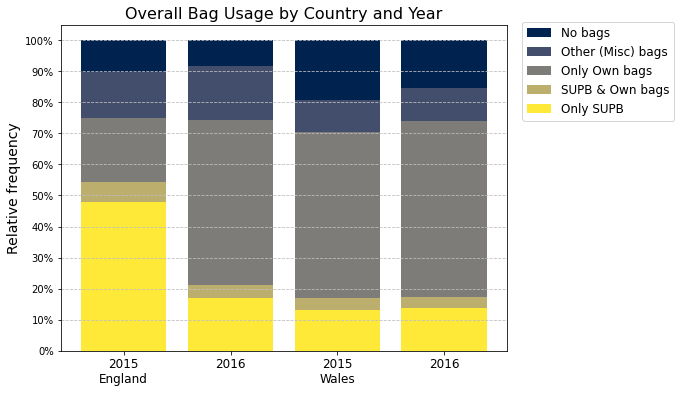

In [10]:
fig_bar2, ax_bar2 = plt.subplots()
bar2_ticks = [f"{c}, {y}" for c, y in zip(df_bar2["Country"], df_bar2["Year"])]
bar2_xlabels = ["2015\nEngland", "2016", 
                "2015\nWales", "2016"]

cmap_cividis = plt.get_cmap("cividis")
colors_cividis5 = cmap_cividis([0, 0.25, 0.5, 0.75, 1])

for i, col in enumerate(new_col_names[::-1]):
    ax_bar2.bar(x = bar2_ticks,
                height = df_bar2[col], 
                bottom = df_bar2[f"{col}_bot"], 
                width = 0.8, 
                zorder = -100, 
                label = col, 
                color = colors_cividis5[i])
    
ax_bar2.set_xlabel("") 
ax_bar2.set_ylabel("Relative frequency", fontsize = 14)
ax_bar2.set_title("Overall Bag Usage by Country and Year", fontsize = 16)

ax_bar2.set_xticks(bar2_ticks)
ax_bar2.set_xticklabels(bar2_xlabels, 
                        fontsize = 12)

ax_bar2.set_yticks(np.arange(0, 1.1, 0.1))
ax_bar2.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 110, 10)])
ax_bar2.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_bar2.set_size_inches([8, 6])
lgd = fig_bar2.legend(loc = 1, bbox_to_anchor = (1.2, 0.9), fontsize= 12)

if save_figures:
    fig_name = f"{figure_path}Bag Usage by Country and Year"
    fig_bar2.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar2.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar2.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")

In [11]:
df_bar3 = df_plastic.loc[df_plastic["Country"] == "England", ["Year", "BagUseGroup", "Time", "IDCODE"]]\
    .groupby(["Year", "Time","BagUseGroup"])\
    .agg(["count"]).unstack()

df_bar3.columns = df_bar3.columns.droplevel()
df_bar3.columns = df_bar3.columns.droplevel()
df_bar3.columns.name = None
df_bar3 

BagUseGroup_order = ["Only SUPB used", "SUPB & Own bags used", "Only Own bags used", "Other (Misc) bags used", "No bags used"]

df_bar3 = df_bar3[BagUseGroup_order]
df_bar3 = df_bar3.reset_index()
df_bar3

new_col_names =  ["Only SUPB", "SUPB & Own bags", "Only Own bags", "Other (Misc) bags", "No bags"]
new_col_dict = dict(list(zip(BagUseGroup_order, new_col_names)))
df_bar3 = df_bar3.rename(columns = new_col_dict)
df_bar3

,Year,Time,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags
0,2015,Evening (4.30-5.30),156,13,41,40,29
1,2015,Morning (10.30-11.30),115,19,67,38,33
2,2015,Saturday Morning (11-12),47,16,35,24,10
3,2015,Saturday evening (1-2),74,6,26,18,12
4,2016,Evening (4.30-5.30),58,9,158,87,27
5,2016,Morning (10.30-11.30),55,12,188,44,30
6,2016,Saturday Morning (11-12),31,14,77,21,13
7,2016,Saturday evening (1-2),23,6,100,20,11


In [12]:
switch_morning_evening = [1, 0, 2, 3, 5, 4, 6, 7]

df_bar3 = df_bar3.iloc[switch_morning_evening, :]
df_bar3 = df_bar3.reset_index(drop = True)
df_bar3

,Year,Time,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags
0,2015,Morning (10.30-11.30),115,19,67,38,33
1,2015,Evening (4.30-5.30),156,13,41,40,29
2,2015,Saturday Morning (11-12),47,16,35,24,10
3,2015,Saturday evening (1-2),74,6,26,18,12
4,2016,Morning (10.30-11.30),55,12,188,44,30
5,2016,Evening (4.30-5.30),58,9,158,87,27
6,2016,Saturday Morning (11-12),31,14,77,21,13
7,2016,Saturday evening (1-2),23,6,100,20,11


In [13]:
df_bar3["sum_cy"] = np.zeros(8, dtype = int)
for each_col in new_col_names:
    df_bar3["sum_cy"] += df_bar3[each_col]

for each_col in new_col_names:
    df_bar3[each_col] = df_bar3[each_col]/df_bar3["sum_cy"]
df_bar3

,Year,Time,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy
0,2015,Morning (10.30-11.30),0.422794,0.069853,0.246324,0.139706,0.121324,272
1,2015,Evening (4.30-5.30),0.559140,0.046595,0.146953,0.143369,0.103943,279
2,2015,Saturday Morning (11-12),0.356061,0.121212,0.265152,0.181818,0.075758,132
3,2015,Saturday evening (1-2),0.544118,0.044118,0.191176,0.132353,0.088235,136
4,2016,Morning (10.30-11.30),0.167173,0.036474,0.571429,0.133739,0.091185,329
5,2016,Evening (4.30-5.30),0.171091,0.026549,0.466077,0.256637,0.079646,339
6,2016,Saturday Morning (11-12),0.198718,0.089744,0.493590,0.134615,0.083333,156
7,2016,Saturday evening (1-2),0.143750,0.037500,0.625000,0.125000,0.068750,160


In [14]:
df_bar3[f"{new_col_names[0]}_bot"] = np.zeros(8, dtype = int)

for i,c in enumerate(new_col_names):
    if i == 0:
        continue
    df_bar3[f"{new_col_names[i]}_bot"] = df_bar3[f"{new_col_names[i-1]}_bot"] + df_bar3[new_col_names[i-1]]
    
df_bar3

,Year,Time,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy,Only SUPB_bot,SUPB & Own bags_bot,Only Own bags_bot,Other (Misc) bags_bot,No bags_bot
0,2015,Morning (10.30-11.30),0.422794,0.069853,0.246324,0.139706,0.121324,272,0,0.422794,0.492647,0.738971,0.878676
1,2015,Evening (4.30-5.30),0.559140,0.046595,0.146953,0.143369,0.103943,279,0,0.559140,0.605735,0.752688,0.896057
2,2015,Saturday Morning (11-12),0.356061,0.121212,0.265152,0.181818,0.075758,132,0,0.356061,0.477273,0.742424,0.924242
3,2015,Saturday evening (1-2),0.544118,0.044118,0.191176,0.132353,0.088235,136,0,0.544118,0.588235,0.779412,0.911765
4,2016,Morning (10.30-11.30),0.167173,0.036474,0.571429,0.133739,0.091185,329,0,0.167173,0.203647,0.775076,0.908815
5,2016,Evening (4.30-5.30),0.171091,0.026549,0.466077,0.256637,0.079646,339,0,0.171091,0.197640,0.663717,0.920354
6,2016,Saturday Morning (11-12),0.198718,0.089744,0.493590,0.134615,0.083333,156,0,0.198718,0.288462,0.782051,0.916667
7,2016,Saturday evening (1-2),0.143750,0.037500,0.625000,0.125000,0.068750,160,0,0.143750,0.181250,0.806250,0.931250


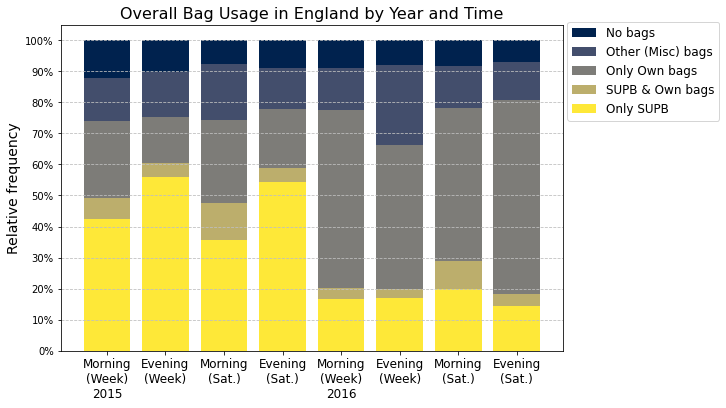

In [15]:
fig_bar3, ax_bar3 = plt.subplots()
bar3_ticks = [f"{c}, {y}" for c, y in zip(df_bar3["Year"], df_bar3["Time"])]
bar3_xlabels = ["Morning\n(Week)\n2015", "Evening\n(Week)", "Morning\n(Sat.)", "Evening\n(Sat.)", 
                "Morning\n(Week)\n2016", "Evening\n(Week)", "Morning\n(Sat.)", "Evening\n(Sat.)"]

for i, col in enumerate(new_col_names[::-1]):
    ax_bar3.bar(x = bar3_ticks,
                height = df_bar3[col], 
                bottom = df_bar3[f"{col}_bot"], 
                width = 0.8, 
                zorder = -100, 
                label = col, 
                color = colors_cividis5[i])
    
ax_bar3.set_xlabel("") 
ax_bar3.set_ylabel("Relative frequency", fontsize = 14)
ax_bar3.set_title("Overall Bag Usage in England by Year and Time", fontsize = 16)

ax_bar3.set_xticks(bar3_ticks)
ax_bar3.set_xticklabels(bar3_xlabels, 
                        rotation = 0, 
                        horizontalalignment = "center", 
                        fontsize = 12)

ax_bar3.set_yticks(np.arange(0, 1.1, 0.1))
ax_bar3.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 110, 10)])
ax_bar3.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_bar3.set_size_inches([9, 6])
lgd = fig_bar3.legend(loc = 1, bbox_to_anchor = (1.15, 0.9), fontsize= 12)

if save_figures:
    fig_name = f"{figure_path}Bag Usage by Time Eng"
    fig_bar3.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar3.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar3.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")

In [16]:
df_bar4 = df_plastic.loc[df_plastic["Country"] == "Wales", ["Year", "BagUseGroup", "Time", "IDCODE"]]\
    .groupby(["Year", "Time","BagUseGroup"])\
    .agg(["count"]).unstack()

df_bar4.columns = df_bar4.columns.droplevel()
df_bar4.columns = df_bar4.columns.droplevel()
df_bar4.columns.name = None
df_bar4 

BagUseGroup_order = ["Only SUPB used", "SUPB & Own bags used", "Only Own bags used", "Other (Misc) bags used", "No bags used"]

df_bar4 = df_bar4[BagUseGroup_order]
df_bar4 = df_bar4.reset_index()
df_bar4

new_col_names =  ["Only SUPB", "SUPB & Own bags", "Only Own bags", "Other (Misc) bags", "No bags"]
new_col_dict = dict(list(zip(BagUseGroup_order, new_col_names)))
df_bar4 = df_bar4.rename(columns = new_col_dict)
df_bar4

,Year,Time,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags
0,2015,Evening (4.30-5.30),42,10,129,28,67
1,2015,Morning (10.30-11.30),32,13,157,19,47
2,2015,Saturday Morning (11-12),16,6,74,20,20
3,2015,Saturday evening (1-2),17,3,77,17,24
4,2016,Evening (4.30-5.30),67,9,212,48,52
5,2016,Morning (10.30-11.30),54,16,212,47,68
6,2016,Saturday Morning (11-12),11,4,125,4,25
7,2016,Saturday evening (1-2),26,12,96,23,32


In [17]:
switch_morning_evening = [1, 0, 2, 3, 5, 4, 6, 7]

df_bar4 = df_bar4.iloc[switch_morning_evening, :]
df_bar4 = df_bar4.reset_index(drop = True)
df_bar4

,Year,Time,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags
0,2015,Morning (10.30-11.30),32,13,157,19,47
1,2015,Evening (4.30-5.30),42,10,129,28,67
2,2015,Saturday Morning (11-12),16,6,74,20,20
3,2015,Saturday evening (1-2),17,3,77,17,24
4,2016,Morning (10.30-11.30),54,16,212,47,68
5,2016,Evening (4.30-5.30),67,9,212,48,52
6,2016,Saturday Morning (11-12),11,4,125,4,25
7,2016,Saturday evening (1-2),26,12,96,23,32


In [18]:
df_bar4["sum_cy"] = np.zeros(8, dtype = int)
for each_col in new_col_names:
    df_bar4["sum_cy"] += df_bar4[each_col]

for each_col in new_col_names:
    df_bar4[each_col] = df_bar4[each_col]/df_bar4["sum_cy"]
df_bar4

,Year,Time,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy
0,2015,Morning (10.30-11.30),0.119403,0.048507,0.585821,0.070896,0.175373,268
1,2015,Evening (4.30-5.30),0.152174,0.036232,0.467391,0.101449,0.242754,276
2,2015,Saturday Morning (11-12),0.117647,0.044118,0.544118,0.147059,0.147059,136
3,2015,Saturday evening (1-2),0.123188,0.021739,0.557971,0.123188,0.173913,138
4,2016,Morning (10.30-11.30),0.136020,0.040302,0.534005,0.118388,0.171285,397
5,2016,Evening (4.30-5.30),0.172680,0.023196,0.546392,0.123711,0.134021,388
6,2016,Saturday Morning (11-12),0.065089,0.023669,0.739645,0.023669,0.147929,169
7,2016,Saturday evening (1-2),0.137566,0.063492,0.507937,0.121693,0.169312,189


In [19]:
df_bar4[f"{new_col_names[0]}_bot"] = np.zeros(8, dtype = int)

for i,c in enumerate(new_col_names):
    if i == 0:
        continue
    df_bar4[f"{new_col_names[i]}_bot"] = df_bar4[f"{new_col_names[i-1]}_bot"] + df_bar4[new_col_names[i-1]]
    
df_bar4

,Year,Time,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy,Only SUPB_bot,SUPB & Own bags_bot,Only Own bags_bot,Other (Misc) bags_bot,No bags_bot
0,2015,Morning (10.30-11.30),0.119403,0.048507,0.585821,0.070896,0.175373,268,0,0.119403,0.167910,0.753731,0.824627
1,2015,Evening (4.30-5.30),0.152174,0.036232,0.467391,0.101449,0.242754,276,0,0.152174,0.188406,0.655797,0.757246
2,2015,Saturday Morning (11-12),0.117647,0.044118,0.544118,0.147059,0.147059,136,0,0.117647,0.161765,0.705882,0.852941
3,2015,Saturday evening (1-2),0.123188,0.021739,0.557971,0.123188,0.173913,138,0,0.123188,0.144928,0.702899,0.826087
4,2016,Morning (10.30-11.30),0.136020,0.040302,0.534005,0.118388,0.171285,397,0,0.136020,0.176322,0.710327,0.828715
5,2016,Evening (4.30-5.30),0.172680,0.023196,0.546392,0.123711,0.134021,388,0,0.172680,0.195876,0.742268,0.865979
6,2016,Saturday Morning (11-12),0.065089,0.023669,0.739645,0.023669,0.147929,169,0,0.065089,0.088757,0.828402,0.852071
7,2016,Saturday evening (1-2),0.137566,0.063492,0.507937,0.121693,0.169312,189,0,0.137566,0.201058,0.708995,0.830688


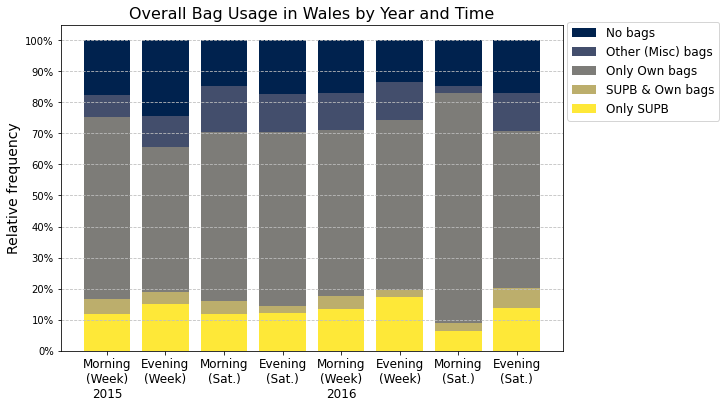

In [20]:
fig_bar4, ax_bar4 = plt.subplots()
bar4_ticks = [f"{c}, {y}" for c, y in zip(df_bar4["Year"], df_bar4["Time"])]
bar4_xlabels = ["Morning\n(Week)\n2015", "Evening\n(Week)", "Morning\n(Sat.)", "Evening\n(Sat.)", 
                "Morning\n(Week)\n2016", "Evening\n(Week)", "Morning\n(Sat.)", "Evening\n(Sat.)"]

for i, col in enumerate(new_col_names[::-1]):
    ax_bar4.bar(x = bar4_ticks,
                height = df_bar4[col], 
                bottom = df_bar4[f"{col}_bot"], 
                width = 0.8, 
                zorder = -100, 
                label = col, 
                color = colors_cividis5[i])
    
ax_bar4.set_xlabel("") 
ax_bar4.set_ylabel("Relative frequency", fontsize = 14)
ax_bar4.set_title("Overall Bag Usage in Wales by Year and Time", fontsize = 16)

ax_bar4.set_xticks(bar4_ticks)
ax_bar4.set_xticklabels(bar4_xlabels, 
                        rotation = 0, 
                        horizontalalignment = "center", 
                        fontsize = 12)

ax_bar4.set_yticks(np.arange(0, 1.1, 0.1))
ax_bar4.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 110, 10)])
ax_bar4.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_bar4.set_size_inches([9, 6])
lgd = fig_bar4.legend(loc = 1, bbox_to_anchor = (1.15, 0.9), fontsize= 12)

if save_figures:
    fig_name = f"{figure_path}Bag Usage by Time Wal"
    fig_bar4.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar4.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar4.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")

In [21]:
df_bar5 = df_plastic[["Year", "Gender", "IDCODE",  "BagUseGroup"]]\
    .groupby(["Year", "Gender",  "BagUseGroup"])\
    .agg(["count"]).unstack()

df_bar5.columns = df_bar5.columns.droplevel()
df_bar5.columns = df_bar5.columns.droplevel()
df_bar5.columns.name = None
df_bar5

BagUseGroup_order = ["Only SUPB used", "SUPB & Own bags used", "Only Own bags used", "Other (Misc) bags used", "No bags used"]

df_bar5 = df_bar5[BagUseGroup_order]
df_bar5 = df_bar5.reset_index()
df_bar5

new_col_names =  ["Only SUPB", "SUPB & Own bags", "Only Own bags", "Other (Misc) bags", "No bags"]
new_col_dict = dict(list(zip(BagUseGroup_order, new_col_names)))
df_bar5 = df_bar5.rename(columns = new_col_dict)
df_bar5

,Year,Gender,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags
0,2015,Female,230,41,276,100,64
1,2015,Group: Gender not applicable,76,30,144,37,43
2,2015,Male,193,15,186,67,135
3,2016,Female,126,40,529,143,86
4,2016,Group: Gender not applicable,50,23,257,33,37
5,2016,Male,149,19,382,118,135


In [22]:
switch_gender_order = [2, 0, 1, 5, 3, 4]

df_bar5 = df_bar5.iloc[switch_gender_order, :]
df_bar5 = df_bar5.reset_index(drop = True)
df_bar5

,Year,Gender,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags
0,2015,Male,193,15,186,67,135
1,2015,Female,230,41,276,100,64
2,2015,Group: Gender not applicable,76,30,144,37,43
3,2016,Male,149,19,382,118,135
4,2016,Female,126,40,529,143,86
5,2016,Group: Gender not applicable,50,23,257,33,37


In [23]:
df_bar5["sum_cy"] = np.zeros(6, dtype = int)
for each_col in new_col_names:
    df_bar5["sum_cy"] += df_bar5[each_col]

for each_col in new_col_names:
    df_bar5[each_col] = df_bar5[each_col]/df_bar5["sum_cy"]
df_bar5

,Year,Gender,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy
0,2015,Male,0.323826,0.025168,0.312081,0.112416,0.226510,596
1,2015,Female,0.323488,0.057665,0.388186,0.140647,0.090014,711
2,2015,Group: Gender not applicable,0.230303,0.090909,0.436364,0.112121,0.130303,330
3,2016,Male,0.185554,0.023661,0.475716,0.146949,0.168120,803
4,2016,Female,0.136364,0.043290,0.572511,0.154762,0.093074,924
5,2016,Group: Gender not applicable,0.125000,0.057500,0.642500,0.082500,0.092500,400


In [24]:
df_bar5[f"{new_col_names[0]}_bot"] = np.zeros(6, dtype = int)

for i,c in enumerate(new_col_names):
    if i == 0:
        continue
    df_bar5[f"{new_col_names[i]}_bot"] = df_bar5[f"{new_col_names[i-1]}_bot"] + df_bar5[new_col_names[i-1]]
    
df_bar5

,Year,Gender,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy,Only SUPB_bot,SUPB & Own bags_bot,Only Own bags_bot,Other (Misc) bags_bot,No bags_bot
0,2015,Male,0.323826,0.025168,0.312081,0.112416,0.226510,596,0,0.323826,0.348993,0.661074,0.773490
1,2015,Female,0.323488,0.057665,0.388186,0.140647,0.090014,711,0,0.323488,0.381153,0.769339,0.909986
2,2015,Group: Gender not applicable,0.230303,0.090909,0.436364,0.112121,0.130303,330,0,0.230303,0.321212,0.757576,0.869697
3,2016,Male,0.185554,0.023661,0.475716,0.146949,0.168120,803,0,0.185554,0.209215,0.684932,0.831880
4,2016,Female,0.136364,0.043290,0.572511,0.154762,0.093074,924,0,0.136364,0.179654,0.752165,0.906926
5,2016,Group: Gender not applicable,0.125000,0.057500,0.642500,0.082500,0.092500,400,0,0.125000,0.182500,0.825000,0.907500


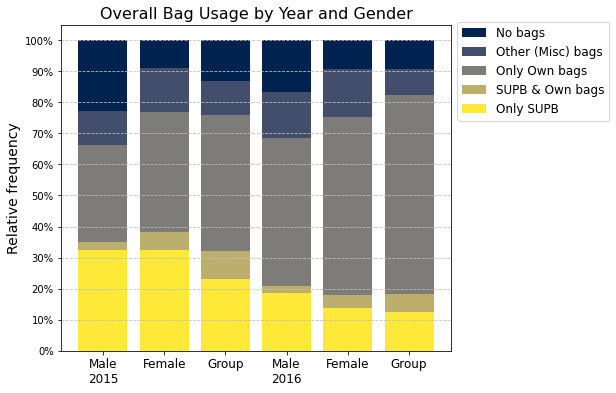

In [25]:
fig_bar5, ax_bar5 = plt.subplots()
bar5_ticks = [f"{c}, {g}" for c, g in zip(df_bar5["Year"], df_bar5["Gender"])]
bar5_xlabels = ["Male\n2015", "Female", "Group",
                "Male\n2016", "Female", "Group"]

for i, col in enumerate(new_col_names[::-1]):
    ax_bar5.bar(x = bar5_ticks,
                height = df_bar5[col], 
                bottom = df_bar5[f"{col}_bot"], 
                width = 0.8, 
                zorder = -100, 
                label = col, 
                color = colors_cividis5[i])
    
ax_bar5.set_xlabel("") 
ax_bar5.set_ylabel("Relative frequency", fontsize = 14)
ax_bar5.set_title("Overall Bag Usage by Year and Gender", fontsize = 16)

ax_bar5.set_xticks(bar5_ticks)
ax_bar5.set_xticklabels(bar5_xlabels, 
                        rotation = 0, 
                        horizontalalignment = "center", 
                        fontsize = 12)

ax_bar5.set_yticks(np.arange(0, 1.1, 0.1))
ax_bar5.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 110, 10)])
ax_bar5.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_bar5.set_size_inches([7, 6])
lgd = fig_bar5.legend(loc = 1, bbox_to_anchor = (1.225, 0.9), fontsize= 12)

if save_figures:
    fig_name = f"{figure_path}Bag Usage by Gender"
    fig_bar5.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar5.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar5.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")

In [26]:
df_bar6 = df_plastic[["Year", "Supermarket", "IDCODE",  "BagUseGroup"]]\
    .groupby(["Year", "Supermarket",  "BagUseGroup"])\
    .agg(["count"]).unstack()

df_bar6.columns = df_bar6.columns.droplevel()
df_bar6.columns = df_bar6.columns.droplevel()
df_bar6.columns.name = None
df_bar6

BagUseGroup_order = ["Only SUPB used", "SUPB & Own bags used", "Only Own bags used", "Other (Misc) bags used", "No bags used"]

df_bar6 = df_bar6[BagUseGroup_order]
df_bar6 = df_bar6.reset_index()
df_bar6

new_col_names =  ["Only SUPB", "SUPB & Own bags", "Only Own bags", "Other (Misc) bags", "No bags"]
new_col_dict = dict(list(zip(BagUseGroup_order, new_col_names)))
df_bar6 = df_bar6.rename(columns = new_col_dict)
df_bar6

,Year,Supermarket,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags
0,2015,Asda,92,22,166,62,76
1,2015,Tesco Extra,127,29,172,29,52
2,2015,Tesco Metro,148,18,105,79,45
3,2015,Waitrose,132,17,163,34,69
4,2016,Asda,51,9,342,86,42
5,2016,Tesco Extra,102,25,329,40,100
6,2016,Tesco Metro,109,26,207,130,43
7,2016,Waitrose,63,22,290,38,73


In [27]:
df_bar6["sum_cy"] = np.zeros(8, dtype = int)
for each_col in new_col_names:
    df_bar6["sum_cy"] += df_bar6[each_col]

for each_col in new_col_names:
    df_bar6[each_col] = df_bar6[each_col]/df_bar6["sum_cy"]
df_bar6

,Year,Supermarket,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy
0,2015,Asda,0.220096,0.052632,0.397129,0.148325,0.181818,418
1,2015,Tesco Extra,0.310513,0.070905,0.420538,0.070905,0.127139,409
2,2015,Tesco Metro,0.374684,0.045570,0.265823,0.200000,0.113924,395
3,2015,Waitrose,0.318072,0.040964,0.392771,0.081928,0.166265,415
4,2016,Asda,0.096226,0.016981,0.645283,0.162264,0.079245,530
5,2016,Tesco Extra,0.171141,0.041946,0.552013,0.067114,0.167785,596
6,2016,Tesco Metro,0.211650,0.050485,0.401942,0.252427,0.083495,515
7,2016,Waitrose,0.129630,0.045267,0.596708,0.078189,0.150206,486


In [28]:
df_bar6[f"{new_col_names[0]}_bot"] = np.zeros(8, dtype = int)

for i,c in enumerate(new_col_names):
    if i == 0:
        continue
    df_bar6[f"{new_col_names[i]}_bot"] = df_bar6[f"{new_col_names[i-1]}_bot"] + df_bar6[new_col_names[i-1]]
    
df_bar6

,Year,Supermarket,Only SUPB,SUPB & Own bags,Only Own bags,Other (Misc) bags,No bags,sum_cy,Only SUPB_bot,SUPB & Own bags_bot,Only Own bags_bot,Other (Misc) bags_bot,No bags_bot
0,2015,Asda,0.220096,0.052632,0.397129,0.148325,0.181818,418,0,0.220096,0.272727,0.669856,0.818182
1,2015,Tesco Extra,0.310513,0.070905,0.420538,0.070905,0.127139,409,0,0.310513,0.381418,0.801956,0.872861
2,2015,Tesco Metro,0.374684,0.045570,0.265823,0.200000,0.113924,395,0,0.374684,0.420253,0.686076,0.886076
3,2015,Waitrose,0.318072,0.040964,0.392771,0.081928,0.166265,415,0,0.318072,0.359036,0.751807,0.833735
4,2016,Asda,0.096226,0.016981,0.645283,0.162264,0.079245,530,0,0.096226,0.113208,0.758491,0.920755
5,2016,Tesco Extra,0.171141,0.041946,0.552013,0.067114,0.167785,596,0,0.171141,0.213087,0.765101,0.832215
6,2016,Tesco Metro,0.211650,0.050485,0.401942,0.252427,0.083495,515,0,0.211650,0.262136,0.664078,0.916505
7,2016,Waitrose,0.129630,0.045267,0.596708,0.078189,0.150206,486,0,0.129630,0.174897,0.771605,0.849794


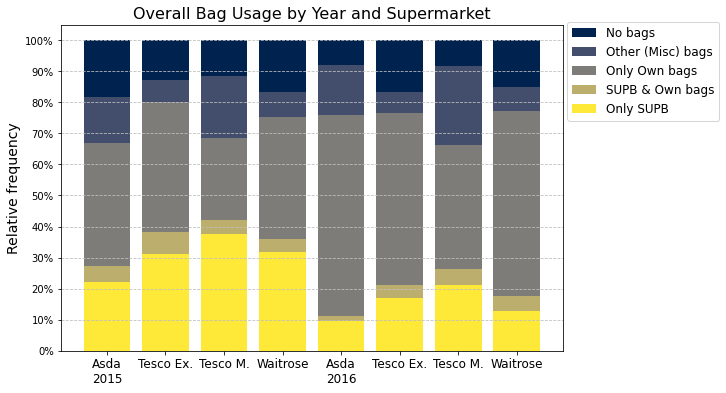

In [29]:
fig_bar6, ax_bar6 = plt.subplots()
bar6_ticks = [f"{y}, {s}" for y, s in zip(df_bar6["Year"], df_bar6["Supermarket"])]
bar6_xlabels = ["Asda\n2015", "Tesco Ex.", "Tesco M.", "Waitrose",
                "Asda\n2016", "Tesco Ex.", "Tesco M.", "Waitrose"]

# Asda Budget
# Tesco Extra Premium
# Tesco Metro Local
# Waitrose Mid-range

for i, col in enumerate(new_col_names[::-1]):
    ax_bar6.bar(x = bar6_ticks,
                height = df_bar6[col], 
                bottom = df_bar6[f"{col}_bot"], 
                width = 0.8, 
                zorder = -100, 
                label = col, 
                color = colors_cividis5[i])
    
ax_bar6.set_xlabel("") 
ax_bar6.set_ylabel("Relative frequency", fontsize = 14)
ax_bar6.set_title("Overall Bag Usage by Year and Supermarket", fontsize = 16)

ax_bar6.set_xticks(bar6_ticks)
ax_bar6.set_xticklabels(bar6_xlabels, 
                        rotation = 0, 
                        horizontalalignment = "center", 
                        fontsize = 12)

ax_bar6.set_yticks(np.arange(0, 1.1, 0.1))
ax_bar6.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 110, 10)])
ax_bar6.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_bar6.set_size_inches([9, 6])
lgd = fig_bar6.legend(loc = 1, bbox_to_anchor = (1.15, 0.9), fontsize= 12)

#save_figures
if save_figures:
    fig_name = f"{figure_path}Bag Usage by Supermarket"
    fig_bar6.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar6.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_bar6.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")

#### Scatter plots and heatmaps

In [30]:
random_gen = np.random.default_rng(123)

def jitter_data(x, rng):
    mu = x
    sigma = 0.1
    return rng.normal(mu, sigma)

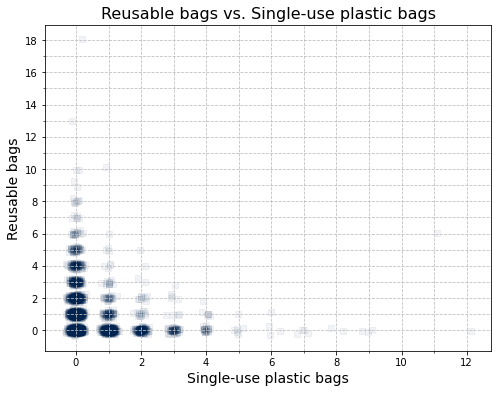

In [31]:
df_scatter = df_plastic[["SUPBSum", "OWNBAGSum"]].copy()
df_scatter["SUPBSum"] = jitter_data(df_scatter["SUPBSum"], random_gen)
df_scatter["OWNBAGSum"] = jitter_data(df_scatter["OWNBAGSum"], random_gen)

fig_sca1, ax_sca1 = plt.subplots()
ax_sca1.scatter(df_scatter["SUPBSum"], df_scatter["OWNBAGSum"], 
                alpha=0.05, 
                color = cmap_cividis(1), 
                marker = ",")

ax_sca1.set_xlabel("Single-use plastic bags", fontsize = 14)
ax_sca1.set_ylabel("Reusable bags", fontsize = 14)
ax_sca1.set_title("Reusable bags vs. Single-use plastic bags", fontsize = 16)
ax_sca1.grid()

ax_sca1.set_yticks(np.arange(0, 19, 2))
ax_sca1.set_yticklabels(np.arange(0, 19, 2))

ax_sca1.set_xticks(np.arange(0, 13, 2))
ax_sca1.set_xticklabels(np.arange(0, 13, 2))


ax_sca1.set_xticks(np.arange(0, 13, 1), minor = True)
ax_sca1.set_yticks(np.arange(0, 19, 1), minor = True)
ax_sca1.grid(linestyle = "dashed", zorder = 200, color = "#bfbfbf")
ax_sca1.grid(which = "minor", linestyle = "dashed", zorder = 200, color = "#bfbfbf")


fig_sca1.set_size_inches([8, 6])

if save_figures:
    fig_name = f"{figure_path}Scatter Reusable vs SUPB"
    fig_sca1.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_sca1.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_sca1.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_inches="tight")

In [32]:
df_heat = df_plastic[["SUPBSum", "OWNBAGSum"]]
heat_xedges = np.arange(-0.5, 13, 1)
heat_yedges = np.arange(-0.5, 19, 1)
heat_array = np.histogram2d(df_heat["SUPBSum"],
                            df_heat["OWNBAGSum"],
                            bins = [heat_xedges, heat_yedges])[0]
heat_array = heat_array.T

heat_array[heat_array == 0] = 0.1
heat_array = np.log(heat_array)/np.log(10)

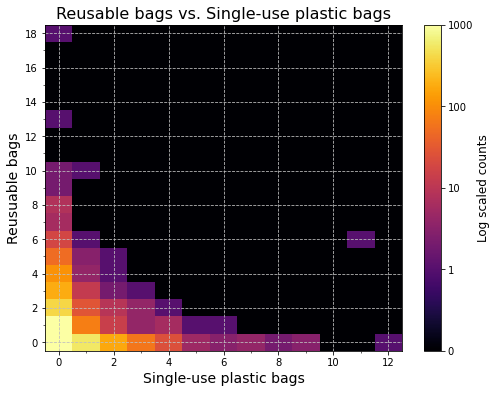

In [33]:
fig_heat, ax_heat = plt.subplots()

heat_handle = ax_heat.pcolormesh(heat_xedges,
                                 heat_yedges, 
                                 heat_array,
                                 cmap = "inferno")
cb = plt.colorbar(heat_handle)
cb.set_ticks([-1, 0, 1, 2, 3])
cb.set_ticklabels([0, 1, 10, 100, 1000])
cb.set_label("Log scaled counts", fontsize = 12)

ax_heat.set_xlabel("Single-use plastic bags", fontsize = 14)
ax_heat.set_ylabel("Reusuable bags", fontsize = 14)
ax_heat.set_title("Reusable bags vs. Single-use plastic bags", fontsize = 16)

ax_heat.set_yticks(np.arange(0, 19, 2))
ax_heat.set_yticklabels(np.arange(0, 19, 2))

ax_heat.set_xticks(np.arange(0, 13, 2))
ax_heat.set_xticklabels(np.arange(0, 13, 2))

ax_heat.set_xticks(np.arange(0, 13, 1), minor = True)
ax_heat.set_yticks(np.arange(0, 19, 1), minor = True)
ax_heat.grid(linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_heat.set_size_inches([8, 6])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Heatmap Reusable vs SUPB"
    fig_heat.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_heat.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_inches="tight")
    fig_heat.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_inches="tight")

#### Other misc. plots. (box, violin, histogram)

In [34]:
df_vio = df_plastic[["SUPBSum","B4LSum", "OWNBAGSum"]]

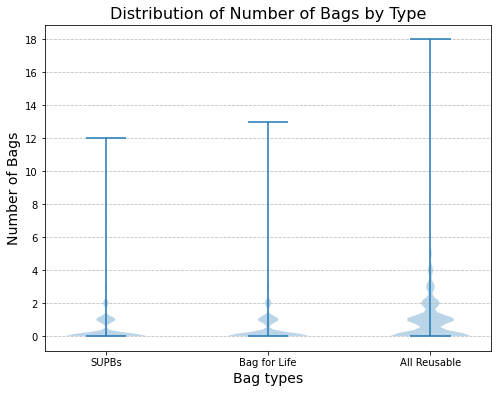

In [35]:
fig_vio, ax_vio = plt.subplots()
ax_vio.violinplot(df_vio)

ax_vio.set_xticks([1, 2, 3])
ax_vio.set_xticklabels(["SUPBs", "Bag for Life", "All Reusable"])

ax_vio.set_yticks(np.arange(0, 19, 2))
ax_vio.set_yticklabels(np.arange(0, 19, 2))

ax_vio.set_xlabel("Bag types", fontsize = 14)
ax_vio.set_ylabel("Number of Bags", fontsize = 14)
ax_vio.set_title("Distribution of Number of Bags by Type", fontsize = 16)

ax_vio.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_vio.set_size_inches([8, 6])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Distribution of Number of Bags by Type"
    fig_vio.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_vio.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_vio.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")

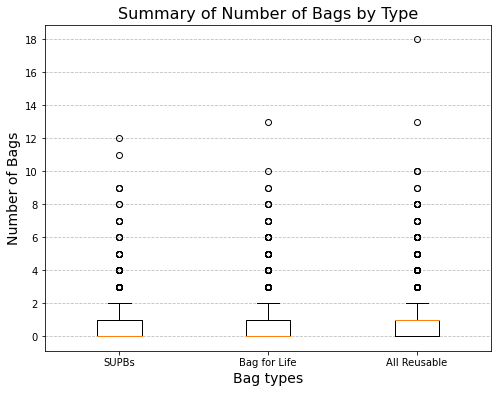

In [36]:
fig_box, ax_box = plt.subplots()
ax_box.boxplot(df_vio)

ax_box.set_xticks([1, 2, 3])
ax_box.set_xticklabels(["SUPBs", "Bag for Life", "All Reusable"])

ax_box.set_yticks(np.arange(0, 19, 2))
ax_box.set_yticklabels(np.arange(0, 19, 2))

ax_box.set_xlabel("Bag types", fontsize = 14)
ax_box.set_ylabel("Number of Bags", fontsize = 14)
ax_box.set_title("Summary of Number of Bags by Type", fontsize = 16)

ax_box.grid(axis = "y", linestyle = "dashed", zorder = 200, color = "#bfbfbf")

fig_box.set_size_inches([8, 6])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Summary of Number of Bags by Type"
    fig_box.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_box.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_box.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")

In [37]:
df_hist = df_plastic[["SUPBSum","B4LSum", "OWNBAGSum"]].copy()
df_hist[df_hist > 10] = 10

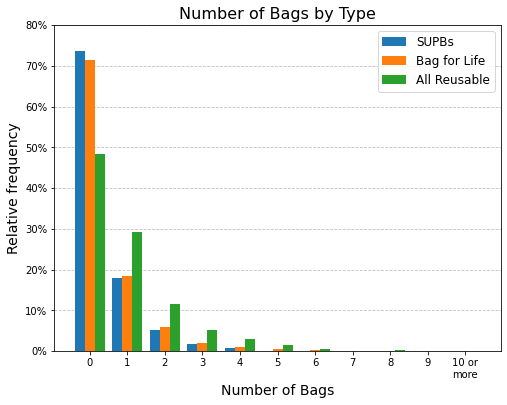

In [38]:
fig_hist, ax_hist = plt.subplots()
ax_hist.hist(df_vio, 
             density = True, 
             bins = np.arange(-0.5, 11, 1), 
             label = ["SUPBs", "Bag for Life", "All Reusable"], 
             zorder = 100)

ax_hist.set_yticks(np.arange(0, 0.9, 0.1))
ax_hist.set_yticklabels([f"{str(i)}%" for i in np.arange(0, 90, 10)])

ax_hist.set_xticks(np.arange(0, 11, 1))

hist_xticks = [str(i) for i in range(10)]
hist_xticks.append("10 or\nmore")
ax_hist.set_xticklabels(hist_xticks)

ax_hist.set_xlabel("Number of Bags", fontsize = 14)
ax_hist.set_ylabel("Relative frequency", fontsize = 14)
ax_hist.set_title("Number of Bags by Type", fontsize = 16)

lgd = ax_hist.legend(loc = 1, fontsize= 12)

ax_hist.grid(axis = "y", linestyle = "dashed", zorder = -100, color = "#bfbfbf")
fig_hist.set_size_inches([8, 6])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Number of bags by type"
    fig_hist.savefig(f"{fig_name}.pdf", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_hist.savefig(f"{fig_name}.png", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")
    fig_hist.savefig(f"{fig_name}.svg", 
                     dpi = 300, 
                     bbox_extra_artists=(lgd,), 
                     bbox_inches="tight")